In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
data=pd.read_csv("predictive.csv")

In [28]:
data.shape

(12000, 19)

In [29]:
data.head()

,Machine_ID,Cycle,Remaining_Useful_Life,Machine_Failure,Failure_Type,Process_Temperature_K,Air_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Power_Consumption_kW,Vibration_mms,Pressure_bar,Ambient_Humidity_%,Ambient_Pressure_bar,Voltage_V,Current_A,Dust_Level_mg/m3,Production_Volume
0,1,1,117,0,NaN,309.508505,301.254356,1522.432434,28.030413,12.419706,7.388107,0.175994,2.446752,56.011767,1.018000,223.334902,8.369380,0.244763,115.000000
1,1,2,116,0,NaN,308.461724,294.340416,1492.702071,27.830629,3.344049,6.523074,0.314924,2.446273,49.171157,0.975698,212.271649,4.438507,0.606440,152.579832
2,1,3,115,0,NaN,312.428582,306.820035,1382.439258,27.718243,-0.693568,6.428045,0.136603,2.266221,54.629681,0.986247,216.479696,7.525610,0.838980,193.159664
3,1,4,114,0,NaN,312.476527,300.440924,1559.394283,28.485806,18.991279,6.589158,0.133556,2.351497,43.160698,0.982185,229.017663,8.157701,0.780146,186.739496
4,1,5,113,0,NaN,306.868637,301.618828,1580.075817,31.667527,18.965329,7.217600,0.282779,2.314346,48.807304,0.996915,229.392869,6.216713,0.910112,174.319328


In [30]:
data.tail()

,Machine_ID,Cycle,Remaining_Useful_Life,Machine_Failure,Failure_Type,Process_Temperature_K,Air_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Power_Consumption_kW,Vibration_mms,Pressure_bar,Ambient_Humidity_%,Ambient_Pressure_bar,Voltage_V,Current_A,Dust_Level_mg/m3,Production_Volume
11995,100,116,0,0,NaN,324.893816,297.477399,865.307295,44.130433,477.036889,9.727289,0.916563,2.444634,36.167522,1.048534,219.570944,12.180928,0.622019,78.680672
11996,100,117,0,0,NaN,324.932122,307.316919,933.971395,41.446268,476.746884,8.680832,0.912181,2.386949,68.387967,1.022737,219.627749,8.187645,0.666469,142.260504
11997,100,118,0,0,NaN,326.140114,300.226876,973.018242,38.757634,490.813556,8.264682,0.985199,2.361925,54.577784,0.956611,223.645526,8.272880,0.847910,78.840336
11998,100,119,0,0,NaN,322.854275,299.990660,905.323299,42.203749,492.876107,8.887718,0.983948,2.634407,40.141751,1.051126,222.281933,10.469533,1.189322,121.420168
11999,100,120,0,0,NaN,327.076116,301.558075,850.788952,40.893895,498.737833,9.272401,1.061815,2.682203,63.631740,1.043184,220.639960,10.527529,1.262446,98.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Machine_ID             12000 non-null  int64  
 1   Cycle                  12000 non-null  int64  
 2   Remaining_Useful_Life  12000 non-null  int64  
 3   Machine_Failure        12000 non-null  int64  
 4   Failure_Type           98 non-null     object 
 5   Process_Temperature_K  12000 non-null  float64
 6   Air_Temperature_K      12000 non-null  float64
 7   Rotational_Speed_rpm   12000 non-null  float64
 8   Torque_Nm              12000 non-null  float64
 9   Tool_Wear_min          12000 non-null  float64
 10  Power_Consumption_kW   12000 non-null  float64
 11  Vibration_mms          12000 non-null  float64
 12  Pressure_bar           12000 non-null  float64
 13  Ambient_Humidity_%     12000 non-null  float64
 14  Ambient_Pressure_bar   12000 non-null  float64
 15  Vo

In [32]:
data.describe()

,Machine_ID,Cycle,Remaining_Useful_Life,Machine_Failure,Process_Temperature_K,Air_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Power_Consumption_kW,Vibration_mms,Pressure_bar,Ambient_Humidity_%,Ambient_Pressure_bar,Voltage_V,Current_A,Dust_Level_mg/m3,Production_Volume
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,50.500000,60.500000,40.948333,0.008167,317.033089,299.993960,1282.627484,31.964099,250.124674,8.255174,0.468685,2.501777,50.025599,1.000120,219.962098,8.012452,0.797360,125.125667
std,28.867273,34.641257,32.961771,0.090004,7.985350,2.999896,142.620865,4.074835,145.956987,1.106280,0.384112,0.201648,11.593255,0.030057,6.950169,2.446492,0.296786,32.481201
min,1.000000,1.000000,0.000000,0.000000,304.223302,289.886612,748.333542,18.844200,-21.905924,5.399600,-1.742241,1.705837,30.008366,0.882328,160.218128,-6.289494,0.104229,50.000000
25%,25.750000,30.750000,8.000000,0.000000,311.514883,297.975594,1179.064407,29.195196,123.628316,7.510343,0.231392,2.367345,40.054665,0.979800,216.320602,6.436763,0.576172,100.384454
50%,50.500000,60.500000,38.000000,0.000000,314.998430,299.997408,1287.549961,31.647640,250.712856,8.109496,0.364445,2.500872,50.006371,1.000121,219.957668,8.013462,0.794836,125.201681
75%,75.250000,90.250000,68.000000,0.000000,320.518368,302.018398,1394.713966,34.450415,376.363919,8.795279,0.665267,2.638406,60.102218,1.020489,223.653744,9.567669,1.023480,150.447479
max,100.000000,120.000000,119.000000,1.000000,353.350631,310.756415,1644.331248,48.919223,526.705534,13.588176,3.628256,3.237896,69.995469,1.115048,288.806931,20.219194,1.495877,199.000000


In [33]:
data.isnull().sum()

Machine_ID                   0
Cycle                        0
Remaining_Useful_Life        0
Machine_Failure              0
Failure_Type             11902
Process_Temperature_K        0
Air_Temperature_K            0
Rotational_Speed_rpm         0
Torque_Nm                    0
Tool_Wear_min                0
Power_Consumption_kW         0
Vibration_mms                0
Pressure_bar                 0
Ambient_Humidity_%           0
Ambient_Pressure_bar         0
Voltage_V                    0
Current_A                    0
Dust_Level_mg/m3             0
Production_Volume            0
dtype: int64

In [34]:
data.dropna()

,Machine_ID,Cycle,Remaining_Useful_Life,Machine_Failure,Failure_Type,Process_Temperature_K,Air_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Power_Consumption_kW,Vibration_mms,Pressure_bar,Ambient_Humidity_%,Ambient_Pressure_bar,Voltage_V,Current_A,Dust_Level_mg/m3,Production_Volume
117,1,118,0,1,Power Failure,322.275041,294.850727,1147.365512,30.908271,499.351364,9.099551,1.046904,2.257096,67.592792,0.964302,225.386036,0.610134,0.839648,77.840336
227,2,108,0,1,Tool Wear,320.759403,295.893886,1157.285819,39.495593,455.991699,9.153773,1.238206,3.036935,69.604354,1.034315,215.674643,5.976136,0.860513,146.042017
333,3,94,0,1,Power Failure,316.025710,302.616946,1166.774267,32.654093,376.594032,9.303855,0.555668,2.663985,60.359073,1.028124,235.357342,12.729120,1.257140,152.924370
446,4,87,0,1,Power Failure,320.856353,298.147539,1155.705378,35.307581,342.046769,9.427884,0.592400,2.244430,66.594312,0.959781,233.036324,7.215411,0.900385,72.865546
579,5,100,0,1,Tool Wear,316.238928,297.888251,1075.438453,37.352617,411.788556,8.939503,1.058889,2.941971,30.470604,0.953217,218.782948,13.358715,0.745852,128.403361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,96,107,0,1,Heat Dissipation Failure,342.362699,301.262586,1103.520494,30.862520,443.674928,12.199780,0.787631,2.312344,37.775506,0.964076,215.966318,7.937756,1.192625,98.462185
11605,97,86,0,1,Power Failure,319.601644,308.689698,1211.601085,31.436879,353.708458,7.857053,0.449620,2.645853,31.784466,0.935755,209.497209,10.205511,0.460120,119.285714
11727,98,88,0,1,Random Failure,318.014436,299.993792,1183.515945,34.977067,366.220382,8.238306,1.961804,2.515308,55.525440,1.027506,217.018453,7.687457,1.030575,121.445378
11846,99,87,0,1,Tool Wear,320.116598,303.709625,1262.044054,37.329113,368.479990,8.226493,0.875983,2.470962,46.421646,0.992803,219.508857,8.994630,1.059768,160.865546


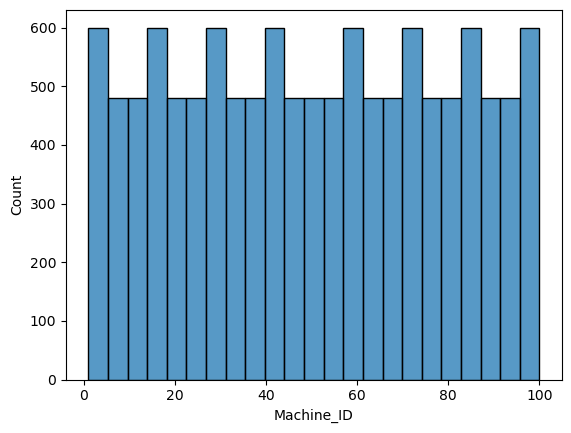

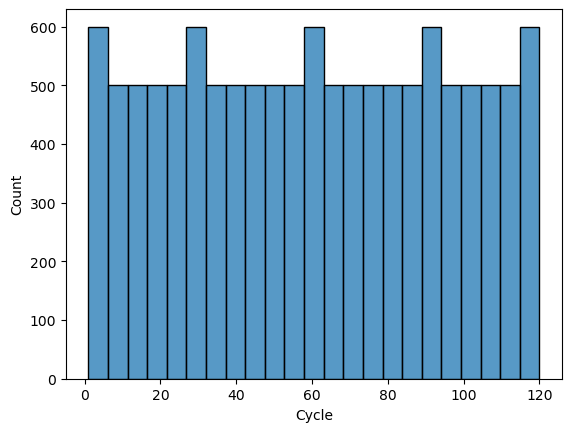

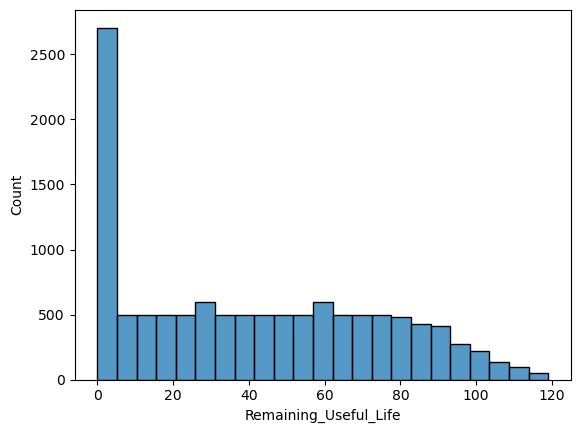

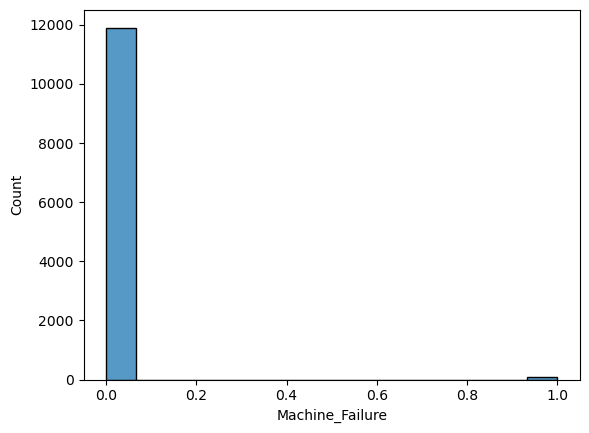

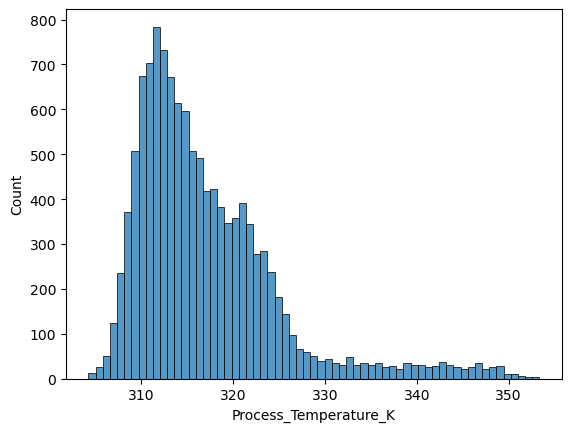

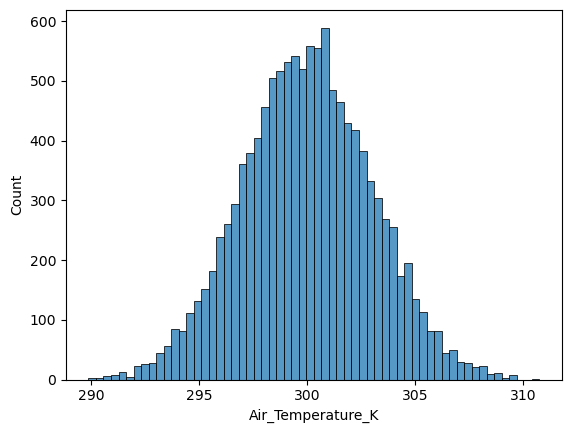

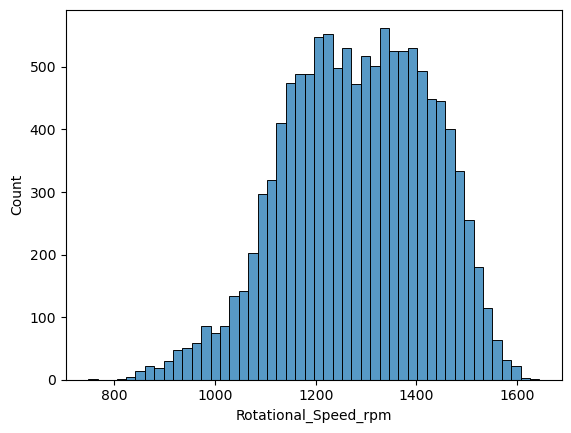

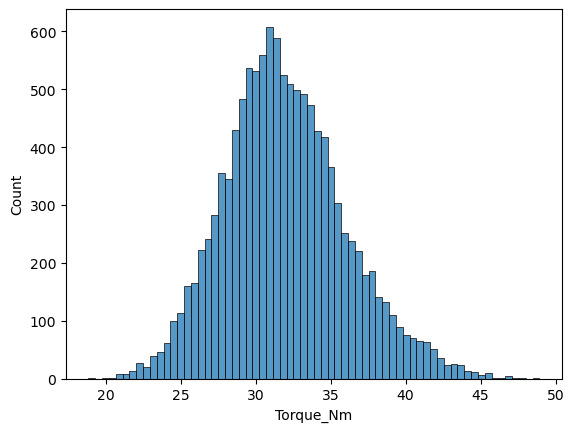

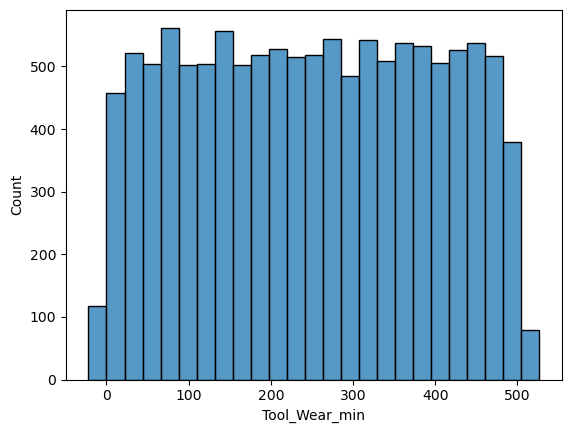

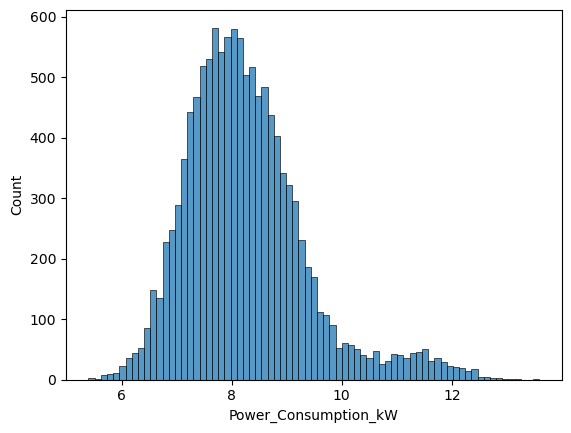

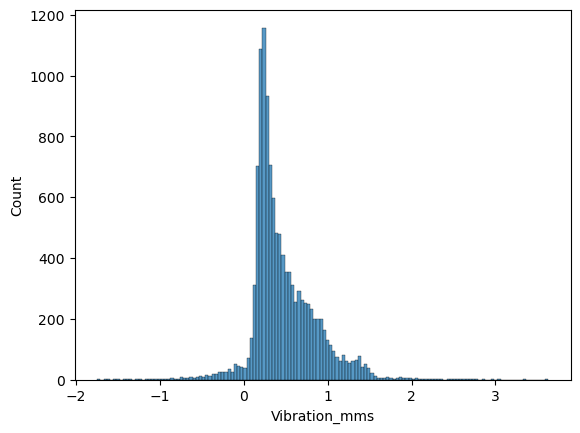

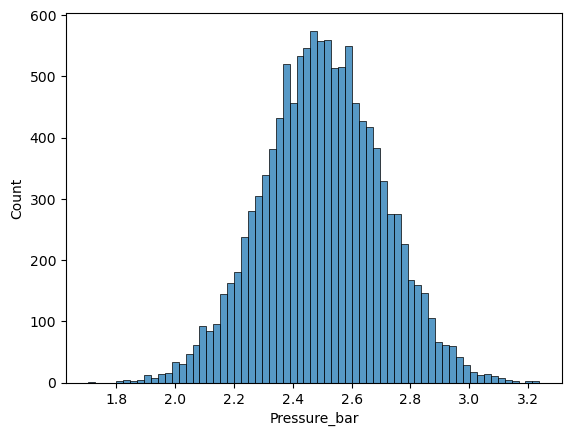

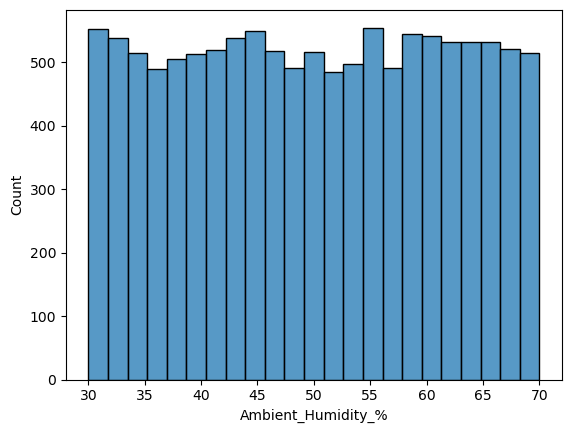

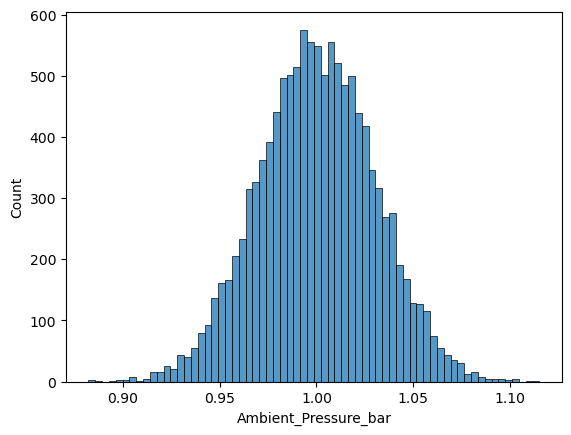

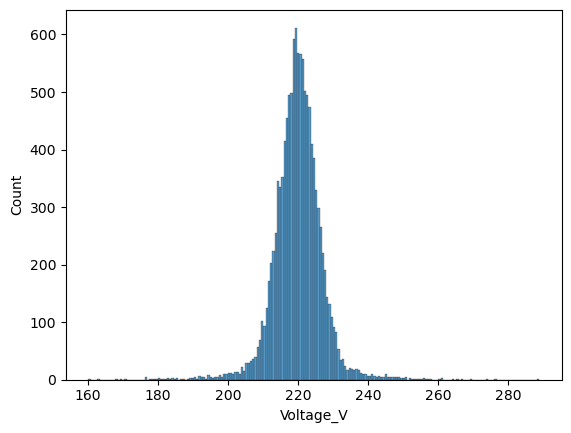

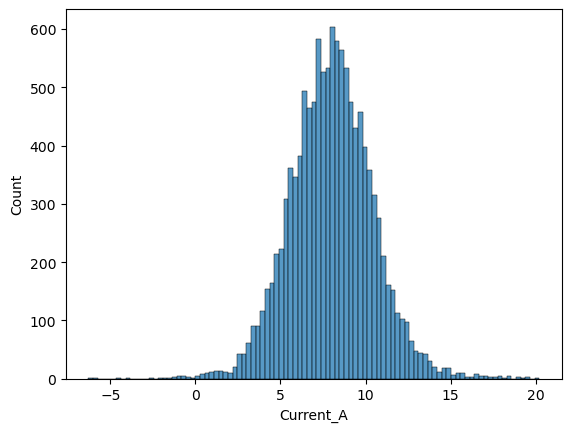

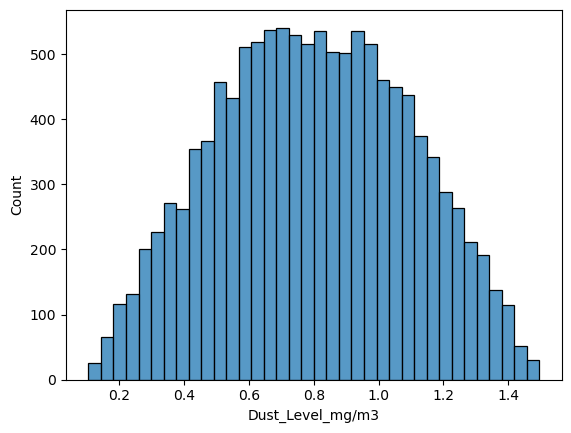

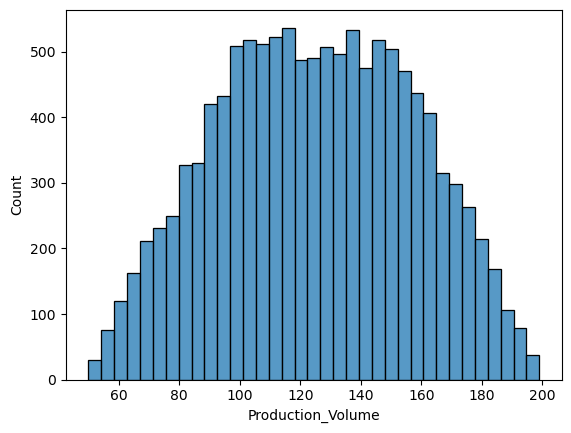

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data,x=i)
    plt.show()

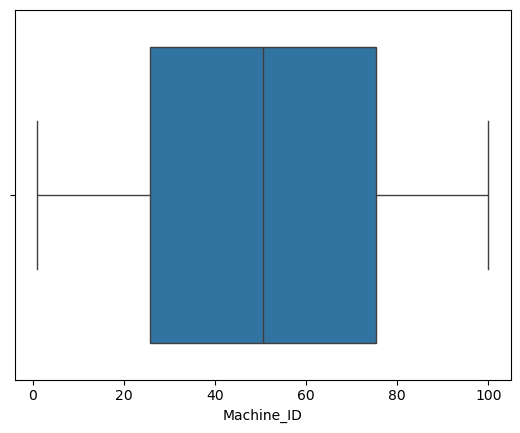

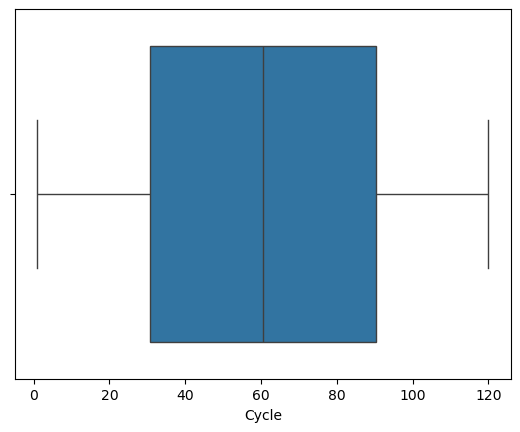

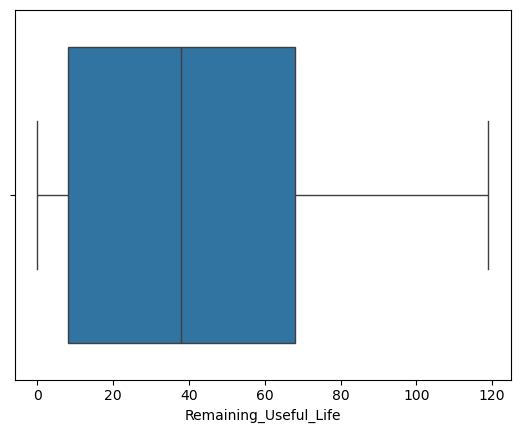

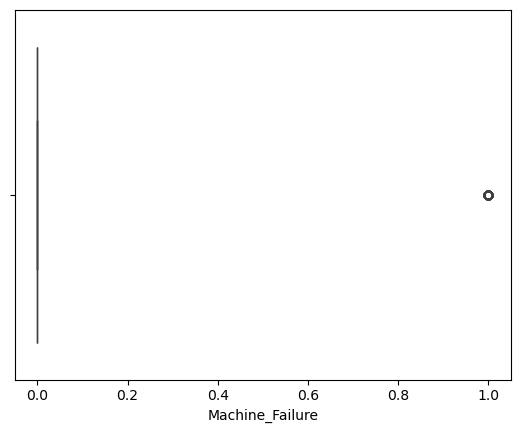

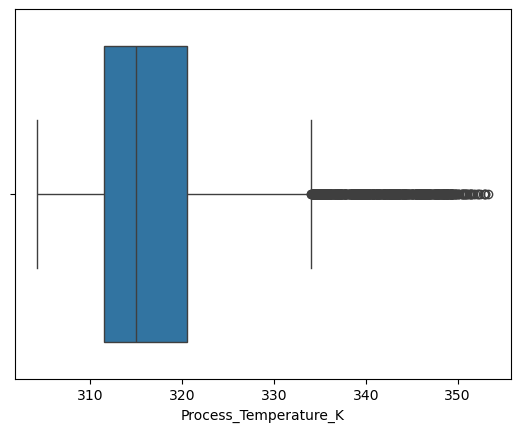

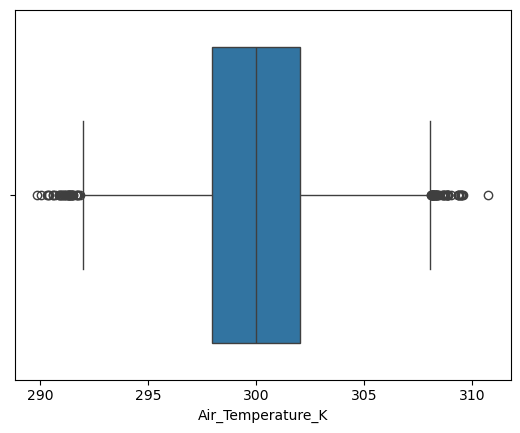

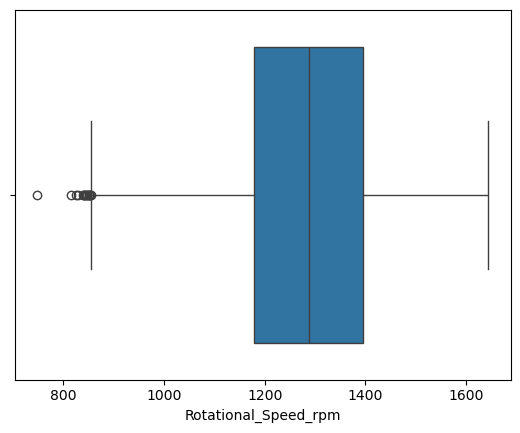

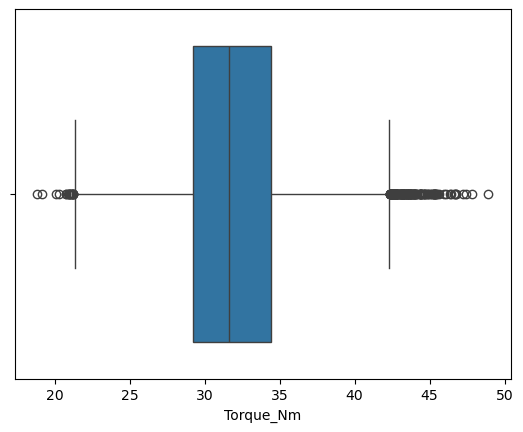

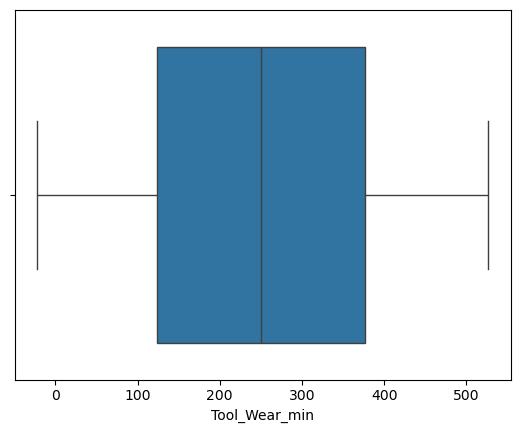

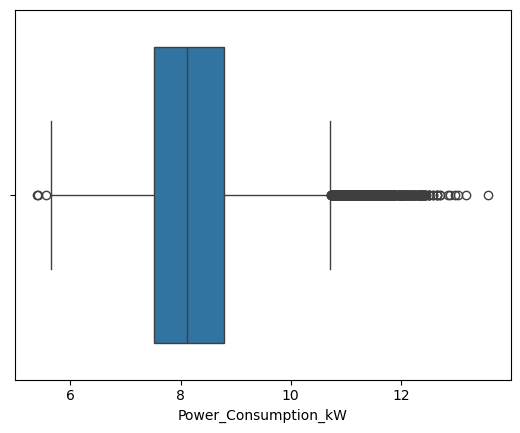

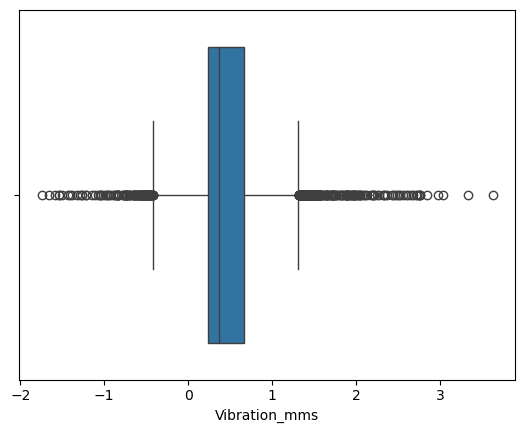

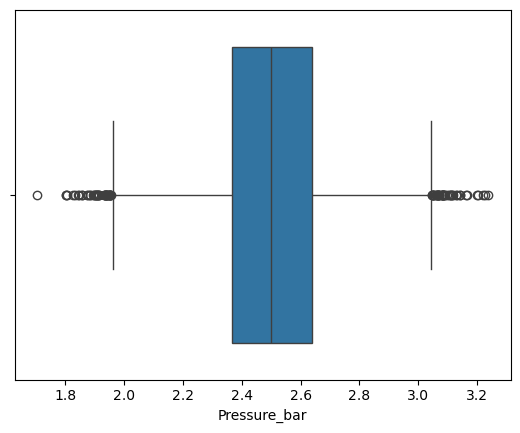

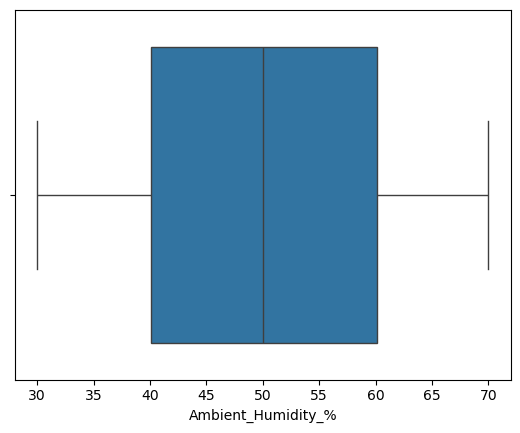

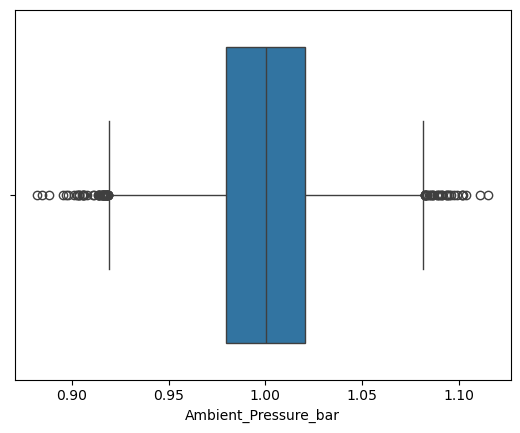

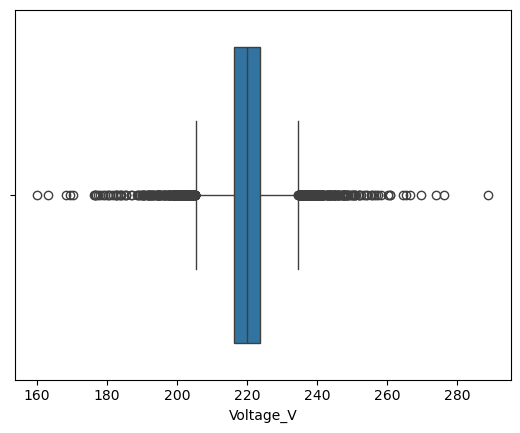

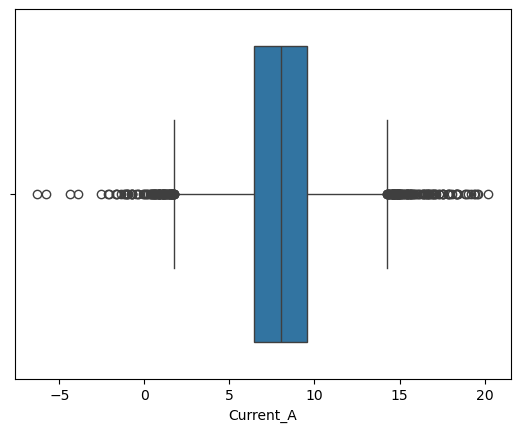

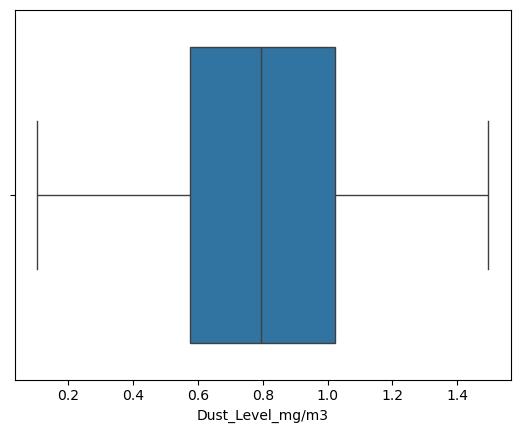

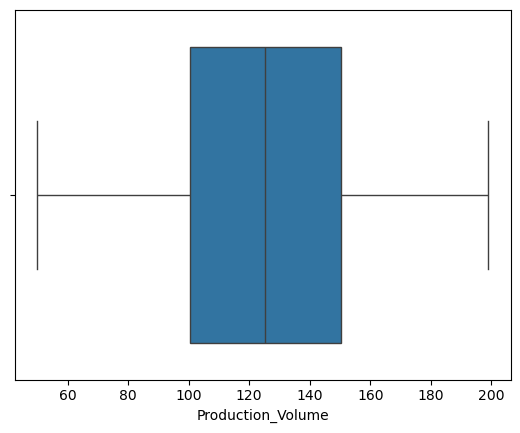

In [36]:
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.show()

<Axes: >

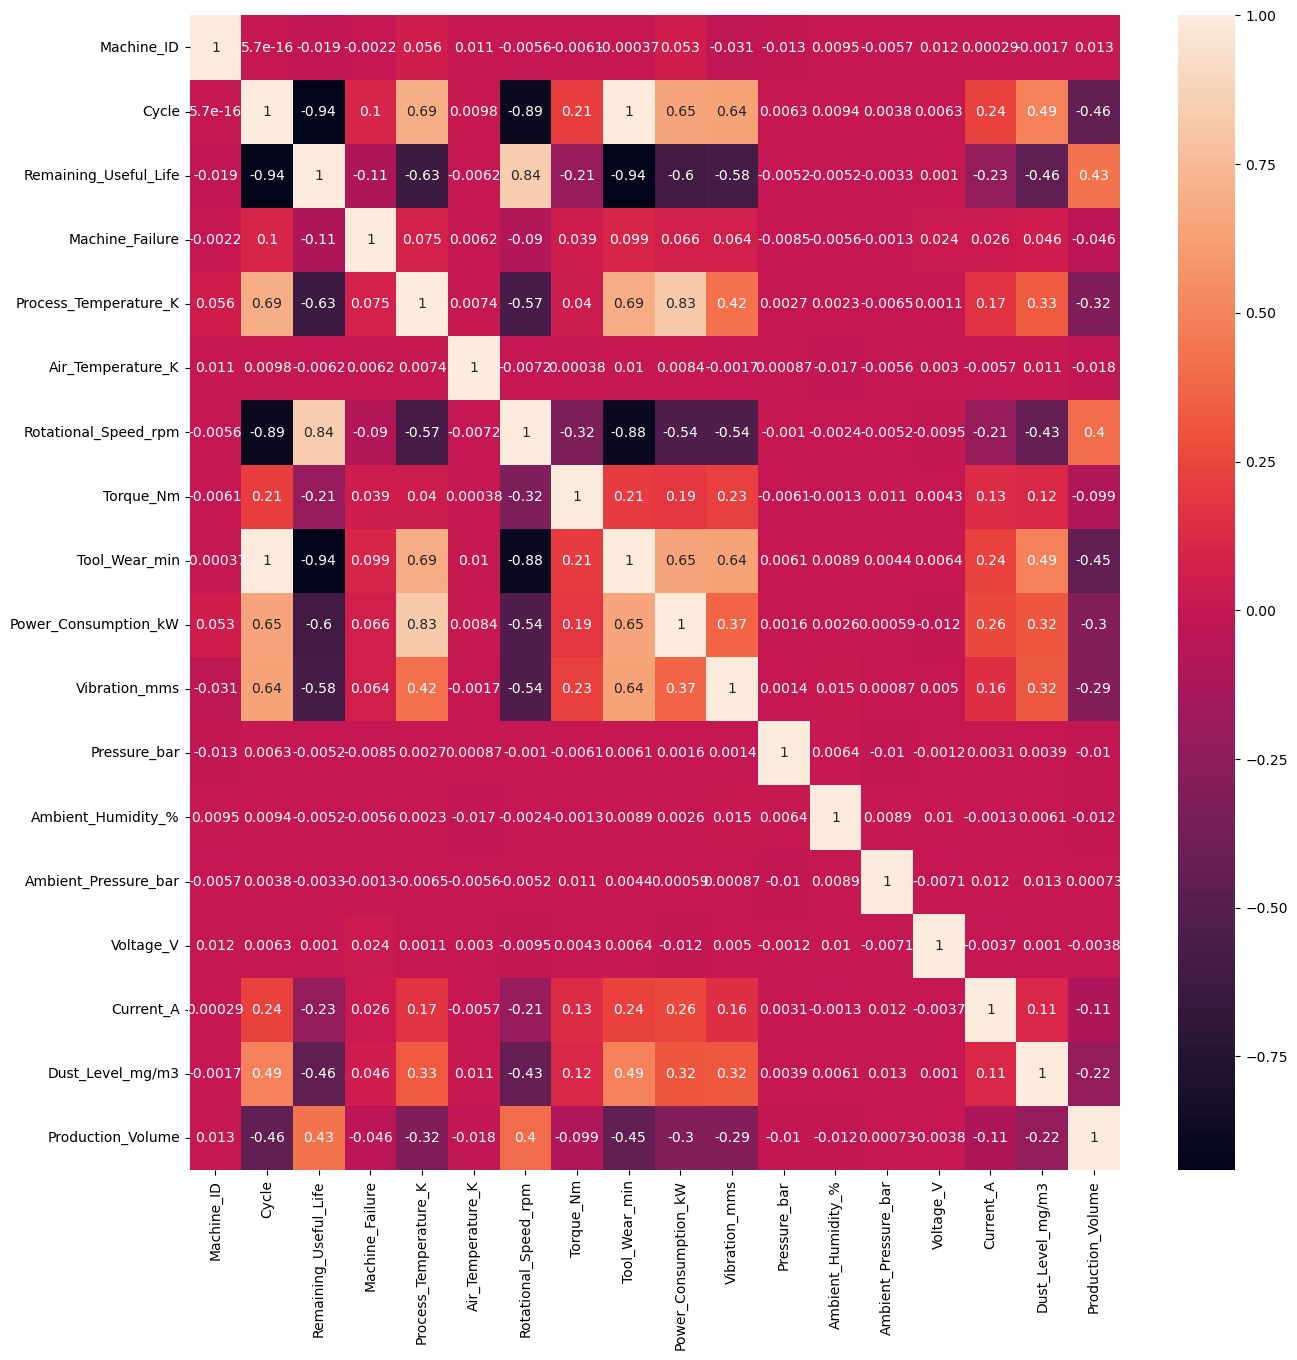

In [37]:
s=data.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [38]:
print(data.columns)
print(data.nunique())

Index(['Machine_ID', 'Cycle', 'Remaining_Useful_Life', 'Machine_Failure',
       'Failure_Type', 'Process_Temperature_K', 'Air_Temperature_K',
       'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min',
       'Power_Consumption_kW', 'Vibration_mms', 'Pressure_bar',
       'Ambient_Humidity_%', 'Ambient_Pressure_bar', 'Voltage_V', 'Current_A',
       'Dust_Level_mg/m3', 'Production_Volume'],
      dtype='object')
Machine_ID                 100
Cycle                      120
Remaining_Useful_Life      120
Machine_Failure              2
Failure_Type                 5
Process_Temperature_K    12000
Air_Temperature_K        12000
Rotational_Speed_rpm     12000
Torque_Nm                12000
Tool_Wear_min            12000
Power_Consumption_kW     12000
Vibration_mms            12000
Pressure_bar             12000
Ambient_Humidity_%       12000
Ambient_Pressure_bar     12000
Voltage_V                12000
Current_A                12000
Dust_Level_mg/m3         12000
Production_Volume       

In [39]:
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_enc.fit_transform(data[col])

In [40]:
target_col = 'Machine_Failure'  # <-- CHANGE to your actual target column name
X = data.drop(target_col, axis=1)
y = data[target_col]

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [43]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 18), (2400, 18), (9600,), (2400,))

In [44]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Check class balance
print("Class distribution in target:", y.value_counts(normalize=True), "\n")

# Logistic Regression with stronger regularization
log_reg = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

# Predictions
log_train_pred = log_reg.predict(X_train)
log_test_pred = log_reg.predict(X_test)

# Metrics
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, log_train_pred))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, log_test_pred))
print("Logistic Regression Test F1 Score:", f1_score(y_test, log_test_pred, average='weighted'))
print(classification_report(y_test, log_test_pred))

# Cross-validation
log_cv = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
print("Logistic Regression CV Mean Accuracy:", log_cv.mean(), "\n")

# Random Forest with anti-overfitting parameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,          # shallower trees to reduce overfitting
    max_features='sqrt',
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Metrics
print("Random Forest Train Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))
print("Random Forest Test F1 Score:", f1_score(y_test, rf_test_pred, average='weighted'))
print(classification_report(y_test, rf_test_pred))

# Cross-validation
rf_cv = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print("Random Forest CV Mean Accuracy:", rf_cv.mean())


Class distribution in target: Machine_Failure
0    0.991833
1    0.008167
Name: proportion, dtype: float64 

Logistic Regression Train Accuracy: 1.0
Logistic Regression Test Accuracy: 1.0
Logistic Regression Test F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2376
           1       1.00      1.00      1.00        24

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

Logistic Regression CV Mean Accuracy: 1.0 

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0
Random Forest Test F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2376
           1       1.00      1.00      1.00        24

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1

In [45]:
# Create test samples for Gradio

# Example 1: Mean values (typical case)
sample_mean = X.mean().round(2).to_dict()

# Example 2: Min values (lower bound case)
sample_min = X.min().round(2).to_dict()

# Example 3: Max values (upper bound case)
sample_max = X.max().round(2).to_dict()

print("Sample (mean values):", sample_mean)
print("\nSample (min values):", sample_min)
print("\nSample (max values):", sample_max)


Sample (mean values): {'Machine_ID': 50.5, 'Cycle': 60.5, 'Remaining_Useful_Life': 40.95, 'Failure_Type': 4.98, 'Process_Temperature_K': 317.03, 'Air_Temperature_K': 299.99, 'Rotational_Speed_rpm': 1282.63, 'Torque_Nm': 31.96, 'Tool_Wear_min': 250.12, 'Power_Consumption_kW': 8.26, 'Vibration_mms': 0.47, 'Pressure_bar': 2.5, 'Ambient_Humidity_%': 50.03, 'Ambient_Pressure_bar': 1.0, 'Voltage_V': 219.96, 'Current_A': 8.01, 'Dust_Level_mg/m3': 0.8, 'Production_Volume': 125.13}

Sample (min values): {'Machine_ID': 1.0, 'Cycle': 1.0, 'Remaining_Useful_Life': 0.0, 'Failure_Type': 0.0, 'Process_Temperature_K': 304.22, 'Air_Temperature_K': 289.89, 'Rotational_Speed_rpm': 748.33, 'Torque_Nm': 18.84, 'Tool_Wear_min': -21.91, 'Power_Consumption_kW': 5.4, 'Vibration_mms': -1.74, 'Pressure_bar': 1.71, 'Ambient_Humidity_%': 30.01, 'Ambient_Pressure_bar': 0.88, 'Voltage_V': 160.22, 'Current_A': -6.29, 'Dust_Level_mg/m3': 0.1, 'Production_Volume': 50.0}

Sample (max values): {'Machine_ID': 100.0, 'Cycl

In [48]:
import gradio as gr
import pandas as pd
import random

# feature_names, X, scaler, rf, log_reg should already exist from your notebook
feature_names = X.columns.tolist()

# Prepare test samples (ordered lists matching feature_names)
sample_mean = X.mean().round(2).to_dict()
sample_min  = X.min().round(2).to_dict()
sample_max  = X.max().round(2).to_dict()
random_row  = X.sample(1, random_state=42).iloc[0].round(2).to_dict()

def predict_gradio(*args):
    """
    args contains: feature1, feature2, ..., featureN, model_choice
    """
    expected = len(feature_names) + 1
    if len(args) != expected:
        return f"Error: expected {expected} inputs (features + model choice), got {len(args)}"
    # separate features and model choice
    feature_vals = args[:-1]
    model_choice = args[-1]

    # ensure numeric
    try:
        feature_vals = [float(v) for v in feature_vals]
    except Exception as e:
        return f"Error converting inputs to floats: {e}"

    # build input dataframe in the correct column order
    input_df = pd.DataFrame([feature_vals], columns=feature_names)

    # scale
    try:
        input_scaled = scaler.transform(input_df)
    except Exception as e:
        return f"Error during scaling: {e}"

    # select model
    model = rf if model_choice == "Random Forest" else log_reg

    # predict
    try:
        pred = model.predict(input_scaled)[0]
    except Exception as e:
        return f"Prediction error: {e}"

    # probabilities if available
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(input_scaled)[0]
        classes = [str(c) for c in model.classes_]
        class_probs = {classes[i]: float(probs[i]) for i in range(len(classes))}
        top_class = classes[int(probs.argmax())]
        top_prob = float(probs.max())
        probs_str = ", ".join([f"{c}: {p:.3f}" for c, p in class_probs.items()])
        return f"Prediction: {pred} (top: {top_class}, confidence: {top_prob:.3f})\nProbabilities -> {probs_str}"
    else:
        return f"Prediction: {pred} (no probabilities available)"

# Build Gradio inputs (default values use column means for convenience)
feature_inputs = [gr.Number(label=col, value=float(X[col].mean())) for col in feature_names]
model_dropdown = gr.Dropdown(["Random Forest", "Logistic Regression"], label="Model", value="Random Forest")

# Examples must be lists matching inputs order (features..., model)
examples = [
    [*(sample_mean[col] for col in feature_names), "Random Forest"],
    [*(sample_min[col]  for col in feature_names), "Random Forest"],
    [*(sample_max[col]  for col in feature_names), "Random Forest"],
    [*(sample_mean[col] for col in feature_names), "Logistic Regression"],
    [*(random_row[col]  for col in feature_names), "Random Forest"],
]

iface = gr.Interface(
    fn=predict_gradio,
    inputs=feature_inputs + [model_dropdown],
    outputs="text",
    title="Classification Predictor",
    description="Enter feature values (or pick an example) and choose a model."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
